In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
def moving_average_crossover():
    
    data["SMA_Short"] = data["Close"].rolling(window=20).mean()
    data["SMA_Long"] = data["Close"].rolling(window=50).mean()
    data["Signal"] = [0]*len(data["SMA_Long"])
    data["SMA_Short"].plot(title="{} Closing Price")
    data["SMA_Long"].plot(title="{} Closing Price")
    plt.legend()
    data.loc[data["SMA_Short"] < data["SMA_Long"] ,"Signal"] = -1
    data.loc[data["SMA_Short"] > data["SMA_Long"], "Signal"] = 1
    # plt.scatter(data[data["Signal"]==1].index, data[data["Signal"]==1]["Close"], label="Buy", marker="^", color="green")
    plt.scatter(data[data["Signal"]==-1].index, data[data["Signal"]==-1]["Close"], label="Sell", marker="v", color="red")
    data["Position"] = data["Signal"].replace(to_replace=0, method="ffill")
    plt.show()

def backtest():
    data["Daily Return"] = data["Close"].pct_change()
    data["Strategy Return"] = data["Daily Return"] * data["Position"]
    print(data["Daily Return"])
    (1 + data["Daily Return"]).cumprod().plot(label="Buy & Hold")
    (1 + data["Strategy Return"]).cumprod().plot(label="Crossover Strategy")
    plt.legend()
    plt.title("Backtesting")
    plt.show()

In [131]:
data = yf.download(tickers="GOOG", start = "2021-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_112741/1176116260.py:13: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data["Position"] = data["Signal"].replace(to_replace=0, method="ffill")


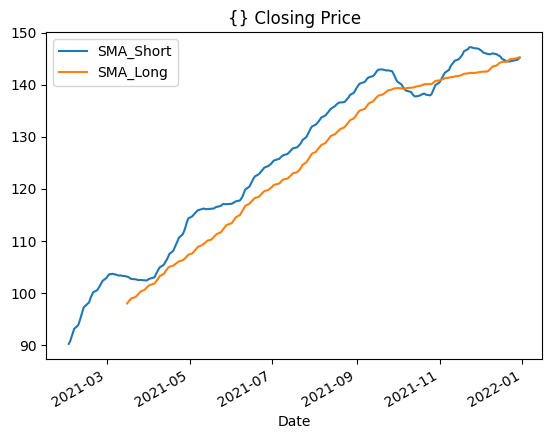

Date
2021-01-04         NaN
2021-01-05    0.007337
2021-01-06   -0.003234
2021-01-07    0.029943
2021-01-08    0.011168
                ...   
2021-12-23    0.001317
2021-12-27    0.006263
2021-12-28   -0.010914
2021-12-29    0.000386
2021-12-30   -0.003427
Name: Daily Return, Length: 251, dtype: float64


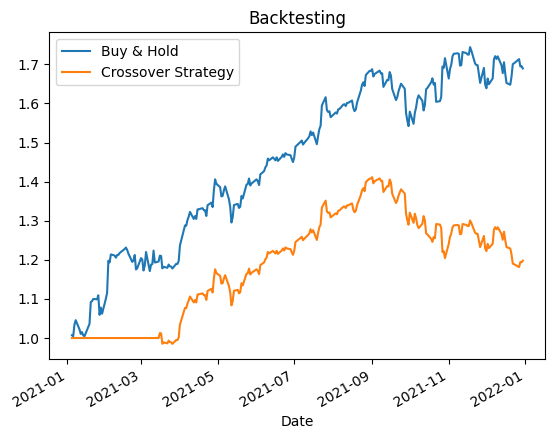

In [132]:
moving_average_crossover()
backtest()

<Axes: xlabel='Date'>

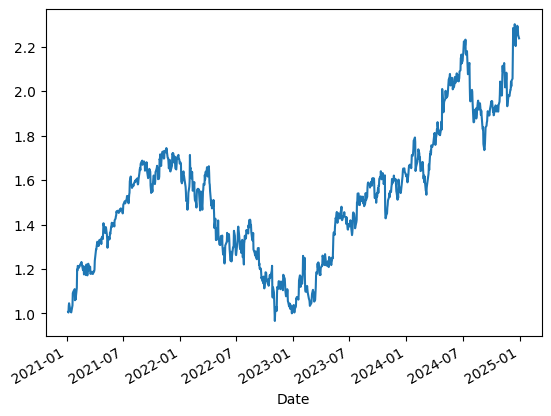

In [103]:
(1 + data["Daily Return"]).cumprod().plot(label="Buy & Hold")